In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re

In [0]:
#ESTO NO LO EJECUTEN SI UTILIZAN UNA VERSION DE PC , YO LO HAGO PARA PODER USAR EL TRAIN DE MI DRIVE,Y USAR EL GITHUB ONLINE
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '17W62hzkAYKT-5tizZWF03jsC4RE0QkqQ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train.csv')

In [0]:
data = pd.read_csv('train.csv')

In [104]:
data['length']=data['text'].str.len()
data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [0]:
data_grouped = data.groupby('target')
data_fake = data_grouped.get_group(0)
data_real = data_grouped.get_group(1)

In [0]:
bins=range(0,160,10)

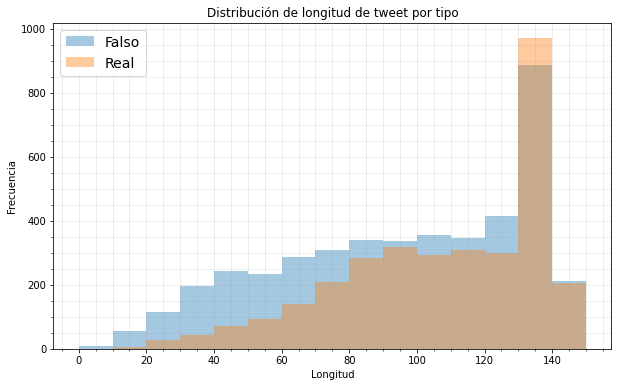

In [107]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

sns.distplot(data_fake['length'],  kde=False, label='Falso', bins=bins)
sns.distplot(data_real['length'],  kde=False,label='Real', bins=bins)

plt.legend(prop={'size': 14})
plt.title('Distribución de longitud de tweet por tipo')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')

plt.minorticks_on()
plt.grid(which='both', color='#999999', linestyle='-', alpha=0.2)
#plt.show()
plt.savefig('Histogram length by type')

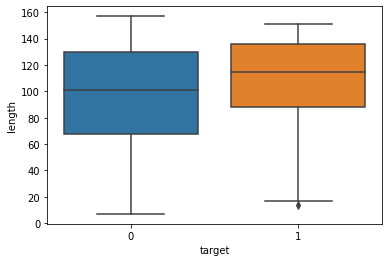

In [108]:
ax = sns.boxplot(x="target", y="length", data=data)

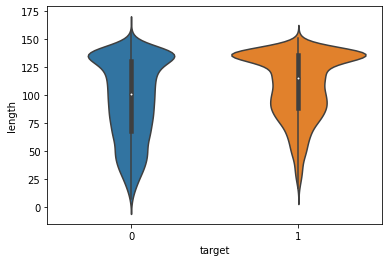

In [109]:
ax = sns.violinplot(x="target", y="length", data=data)

**Keyword**

In [0]:
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   length    7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [112]:
grouped_by_keyword = data.groupby('keyword').agg({'target':'mean','length':'mean'}).reset_index()
grouped_by_keyword.columns=['keyword','target_mean','length_mean']
grouped_by_keyword

,keyword,target_mean,length_mean
0,ablaze,0.361111,94.694444
1,accident,0.685714,100.085714
2,aftershock,0.000000,101.205882
3,airplane accident,0.857143,106.400000
4,ambulance,0.526316,98.394737
...,...,...,...
216,wounded,0.702703,111.054054
217,wounds,0.303030,103.363636
218,wreck,0.189189,88.540541
219,wreckage,1.000000,122.256410


In [113]:
grouped_by_keyword.sort_values(['target_mean'],ascending=False)

,keyword,target_mean,length_mean
62,debris,1.000000,107.594595
219,wreckage,1.000000,122.256410
70,derailment,1.000000,109.794872
153,outbreak,0.975000,128.925000
152,oil spill,0.973684,102.973684
...,...,...,...
27,body bag,0.030303,125.393939
19,blazing,0.029412,96.382353
170,ruin,0.027027,75.459459
29,body bags,0.024390,100.780488


In [114]:
grouped_by_keyword.sort_values(['length_mean'],ascending=False)

,keyword,target_mean,length_mean
166,rescuers,0.914286,129.342857
153,outbreak,0.975000,128.925000
79,devastation,0.750000,125.722222
27,body bag,0.030303,125.393939
92,emergency services,0.333333,125.363636
...,...,...,...
23,blizzard,0.108108,71.891892
180,smoke,0.088235,70.882353
173,screaming,0.055556,70.472222
174,screams,0.142857,70.428571


In [0]:
#Barplot?

**Wordcloud**

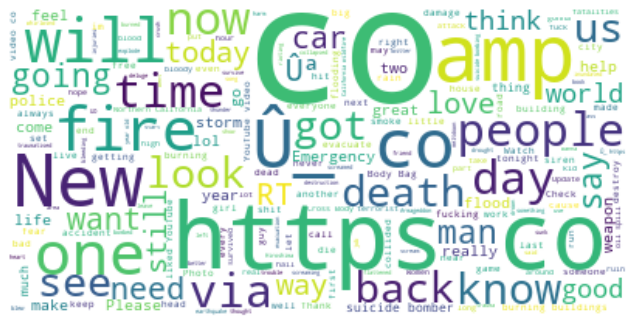

In [116]:
wordcloud = WordCloud(background_color="white").generate(' '.join(data['text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
#Hay muchas url

In [118]:
data[data['text'].str.contains(pat = 'http')]

,id,keyword,location,text,target,length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55
...,...,...,...,...,...,...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65


In [0]:
#data['text_no_url'] = data['text'].str.replace(r'http\S+', '', regex=True)

In [120]:
data['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

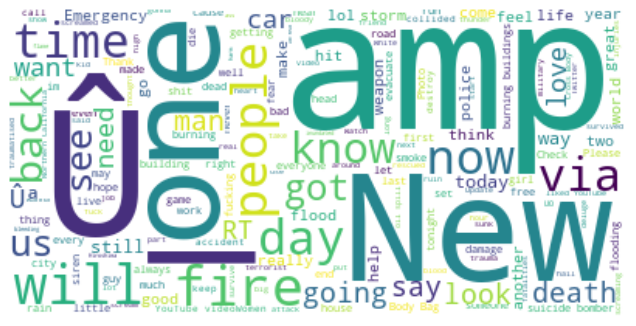

In [121]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 400).generate(' '.join(data['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()                 

In [0]:
#thi? amp? Û?

In [0]:
#Data real

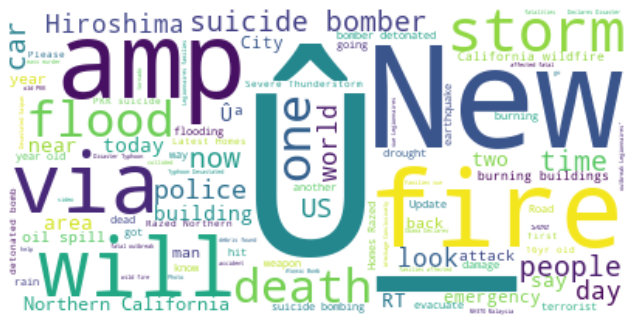

In [124]:
#Wordcloud
wordcloud = WordCloud(background_color="white").generate(' '.join(data_real['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [0]:
#Data falsa

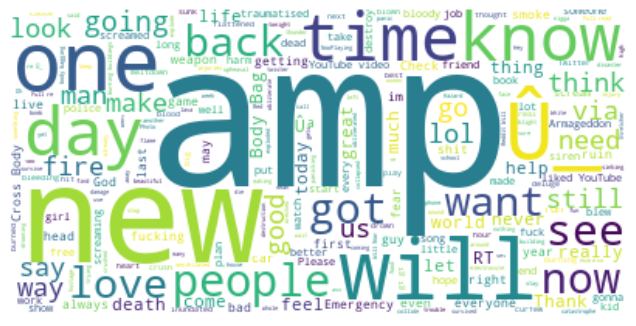

In [126]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 2500).generate(' '.join(data_fake['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [127]:
data[data['text'].str.contains('Û')]['text'].to_list()

['Barbados #Bridgetown JAMAICA \x89ÛÒ Two cars set ablaze: SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J',
 'SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintendent Lanford Salmon has r ... - http://t.co/vplR5Hka2u http://t.co/SxHW2TNNLf',
 'Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips @\x89Û_ https://t.co/cYoMPZ1A0Z',
 '#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident tee\x89Û_',
 'RT nAAYf: First accident in years. Turning onto Chandanee Magu from near MMA. Taxi rammed into me while I was halfway turned. Everyone conf\x89Û_',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co/weQPesENku',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co

In [0]:
#Limpiar texto. Eliminar \x89Û

aca agrego lo que hice hasta ahora


porcentaje por  top 5 de paises ordenados de mayor a menor  cantidad de tweet


Text(0, 0.5, 'paises')

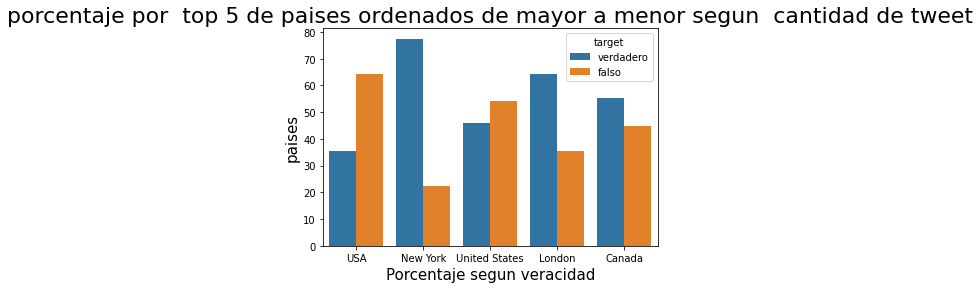

In [129]:
cant_tweet_by_location_by_target=data.loc[ : ].fillna({'location':'nada'}).groupby(['location','target']).agg({'target':'count'})
cant_tweet_by_location_by_target.columns=['cantidad']
cant_total_tweet_by_location=cant_tweet_by_location_by_target.groupby('location').transform("sum")
porcentaje=(cant_tweet_by_location_by_target/ cant_total_tweet_by_location)*100
porcentaje=porcentaje.unstack()
porcentaje.columns=['verdadero','falso']
porcentaje=porcentaje.reset_index()
total_por_location=data.loc[:,:].groupby('location')['target'].count().nlargest(5).reset_index()
porcentaje_por_location=pd.merge(total_por_location,porcentaje,how='left',on='location')
porcentaje_por_location=porcentaje_por_location.loc[:,['location','verdadero','falso']]
plot_porcentaje=pd.melt(porcentaje_por_location, id_vars="location",var_name="target" ,value_name="survival rate")
g=sns.barplot(x='location', y='survival rate', hue='target',data=plot_porcentaje)
g.set_title("porcentaje por  top 5 de paises ordenados de mayor a menor segun  cantidad de tweet", fontsize=22)
g.set_xlabel("Porcentaje segun veracidad",fontsize=15)
g.set_ylabel("paises", fontsize=15)

,relacion entre cantidad arroba,http y su veracidad

[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

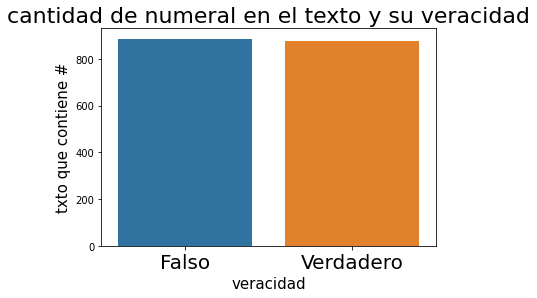

In [130]:
cant_arroba_veracidad=data['text'].str.contains('#').groupby(data['target']).sum().reset_index()
cant_arroba_veracidad.columns=['veracidad','cantidad']
g=sns.barplot(x='veracidad', y='cantidad', data=cant_arroba_veracidad)
g.set_title("cantidad de numeral en el texto y su veracidad", fontsize=22)
g.set_xlabel("veracidad",fontsize=15)
g.set_ylabel("txto que contiene #", fontsize=15)
g.set_xticklabels(['Falso','Verdadero'], rotation='horizontal', fontsize=20)

[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

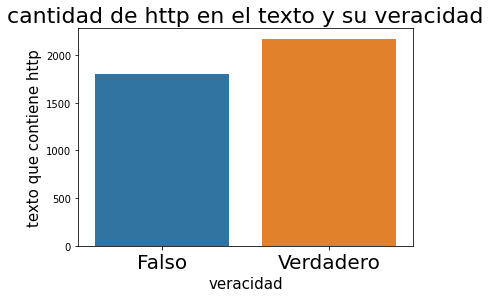

In [131]:
cant_http_veracidad=data['text'].str.contains('http').groupby(data['target']).sum().reset_index()
cant_http_veracidad.columns=['veracidad','cantidad']
g=sns.barplot(x='veracidad', y='cantidad', data=cant_http_veracidad)
g.set_title("cantidad de http en el texto y su veracidad", fontsize=22)
g.set_xlabel("veracidad",fontsize=15)
g.set_ylabel("texto que contiene http", fontsize=15)
g.set_xticklabels(['Falso','Verdadero'], rotation='horizontal', fontsize=20)

In [0]:
paises con promedio de longitud de tweet verdadero   mayor al promedio mundial de tweet verdaderos

Text(0, 0.5, 'promedio de longitud de tweet verdaderos')

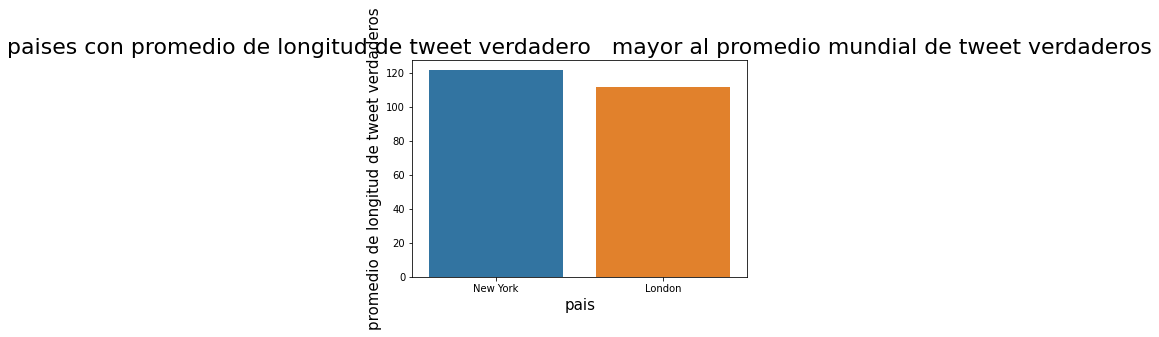

In [479]:
datasinnullos=data.fillna({'location':'nada'})
mean_by_location_target=datasinnullos.loc[:].groupby(['location','target']).agg({'length':'mean'})
mean_by_location_target=mean_by_location_target.unstack()
mean_by_location_target.columns=['meanlenght_falsos','meanlength_verdaderos']
mean_by_location_target=mean_by_location_target.reset_index()
#aca agarro los paises con por lo menos 40 tweet hechos, sino da cualquier 
#resultado(paises con un solo tweet que gana al promedio de verdadero o falso)
boolean_paises_hightcounttweet=datasinnullos.loc[:].groupby('location')['target'].count()>40
boolean_paises_hightcounttweet=boolean_paises_hightcounttweet.to_frame().reset_index()['target']
#agrego una columna boolean que calcule antes para filtrar solo paises que sean mayor a 40 tweet
mean_by_location_target['superalos40tweet']=boolean_paises_hightcounttweet
mean_by_location_target=mean_by_location_target[mean_by_location_target['superalos40tweet']]
#meanlength_mundial_false=datasinnullos.groupby('target').agg({'length':'mean'}).unstack()
#meanlength_mundial_true=datasinnullos.loc[datasinnullos['target']==0,'length'].mean()
mean_by_location_target['meanlength_mundial_falsos']=95
mean_by_location_target['meanlength_mundial_verdaderos']=108
mean_by_location_target['pais_meanlength_mayor_prommundial_true']=mean_by_location_target['meanlength_verdaderos']>mean_by_location_target['meanlength_mundial_verdaderos']
paisesmenmayoralmeanmundial=mean_by_location_target[mean_by_location_target['pais_meanlength_mayor_prommundial_true']]
d=paisesmenmayoralmeanmundial[['location','meanlength_verdaderos','meanlength_mundial_verdaderos']].nlargest(9,'meanlength_verdaderos')
g=sns.barplot(x='location', y='meanlength_verdaderos', data=d)
g.set_title("paises con promedio de longitud de tweet verdadero   mayor al promedio mundial de tweet verdaderos", fontsize=22)
g.set_xlabel("pais",fontsize=15)
g.set_ylabel("promedio de longitud de tweet verdaderos", fontsize=15)